# 텍스트 학습

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pylab as plt

## load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

In [2]:
train_xdata = np.array([np.reshape(x, (28*28)) for x in mnist.train.images])     
test_xdata = np.array([np.reshape(x, (28*28)) for x in mnist.test.images])    # 나중에 feeding 할 것.

train_labels = mnist.train.labels
test_labels = mnist.test.labels                   # 나중에 feeding 할 것.

print(train_xdata.size, train_xdata.shape)
print(train_labels.size, train_labels.shape)

43120000 (55000, 784)
550000 (55000, 10)


In [4]:
X = tf.placeholder(tf.float32, [None, 784])      # 28*28 픽셀로 one-hot 인코딩이므로 784가지 특징으로 구성됨.
Y = tf.placeholder(tf.float32, [None, 10])       # label은 0부터 9까지 총 10개, True Y

W1 = tf.Variable(tf.random_normal([784,484]))
b1 = tf.Variable(tf.zeros([484]))
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([484,256]))
b2 = tf.Variable(tf.zeros([256]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,64]))
b3 = tf.Variable(tf.zeros([64]))
layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)

W4 = tf.Variable(tf.random_normal([64,10]))
b4 = tf.Variable(tf.zeros([10]))
logits = tf.matmul(layer3, W4)+b4
model = tf.nn.softmax(logits)                # hypothesis Y

cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
#cross_entropy= -tf.reduce_sum( Y*tf.log(model)+(1-Y)*tf.log(1-model))

#train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(model,1), tf.arg_max(Y, 1))       #행 방향으로 같은지.
#correct_prediction=tf.equal( tf.to_float(tf.greater(model,0.5)), Y ) 

accuracy  = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# shuffle function
from sklearn.utils import shuffle

## initializing
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

## mini batch 학습
train_epochs = 100
batch_size = 100
n_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(train_epochs):
    X_, Y_ = shuffle(train_xdata, train_labels)
    
    for i in range(n_batch):
        start = 0 + i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
        X:X_[start:end, ],
        Y:Y_[start:end, ]
        })
    
# 훈련 끝

In [5]:
print("Accuracy:", accuracy.eval(session=sess, feed_dict={X:test_xdata, Y:test_labels}))

Accuracy: 0.9718


In [6]:
## comparing ##

label = sess.run(tf.argmax(test_labels, 1))
prediction = sess.run(tf.argmax(model, 1), feed_dict={X: test_xdata})

# list 할당.
real=[]
pred=[]
index=[]
for i in range(0, mnist.test.num_examples):
    if label[i] != prediction[i]:
        index.append(i)
        real.append(label[i])
        pred.append(prediction[i])
        
fault_result = pd.DataFrame({'label':real, 'predict':pred}, index=index)         #pandas dataframe
fault_result.head()

,label,predict
62,9,8
211,5,8
247,4,6
259,6,0
274,9,3


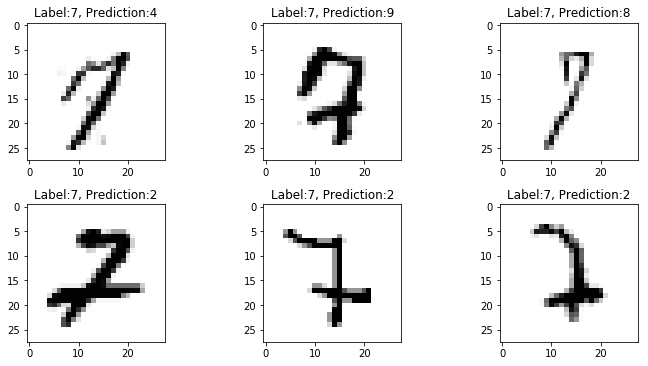

In [7]:
## plotting
comparing_data = fault_result.query('label == 7').sample(n=6).index         #잘못 예측된 데이터 중 간단히 6개만 추출.

count = 0
nrows = 4
ncols = 3
plt.figure(figsize=(10,10))
for i in comparing_data:          #index i 가 comparing data안에서 for문 반복.
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_xdata[i].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plots = "Label:" + str(fault_result['label'][i]) + ", Prediction:" + str(fault_result['predict'][i])
    plt.title(plots)

plt.tight_layout()
plt.show()